# Reading and Visualizing Whole Slide Images

Click to open in:  \[[GitHub](https://github.com/)\]

## What is this Notebook?

This Jupyter notebook is designed for accessibility and convenience, as it can be executed on any computer via a standard web browser without the need to install any programming language beforehand. Thanks to Google Colaboratory's capabilities, it can be run remotely over the Internet, completely free of charge. To initiate a session with Colab, click on either of the two blue checkboxes above, ensuring that "colab" is visible in the address bar. If a left click doesn't activate the function for you, right-click on "Open in Colab" and select "Open in new tab". Please take a moment to familiarize yourself with the drop-down menus located near the top of the window. These will enable you to edit the notebook during the session. For instance, you might choose to replace the image files used in this demo with your own, or to experiment with different function parameters. It's important to note that the original version of this notebook on GitHub or Colab cannot be permanently altered by a regular user, so you need not worry about inadvertently making irreversible changes.

If you wish to save any modifications you make to this notebook, navigate to the notebook's File Menu.

In case you'd like to operate this notebook on a platform other than Colab, you'll need to configure your Python environment as outlined in the README file.

## WSI Reader Demo
This demonstration guides you through the process of utilizing tiatoolbox to interact with a whole slide image (WSI). The objective is to provide you with an understanding of how to load a WSI, extract relevant information, and subsequently retrieve image patches.

In the first part of this demo, we focus on loading a sample WSI. This involves utilizing tiatoolbox's built-in functions to successfully read the image file. These functions are designed to handle the complexities of WSI files, which can be vast and multi-layered, ensuring that the image is loaded accurately and efficiently.

After successfully loading the WSI, we proceed to extract key information about the image. This involves identifying and logging characteristics such as the slide's dimensions, the number of image layers, and the magnification levels. By understanding these attributes, we can more effectively analyze the slide and extract relevant sections for further study.

The next stage of this demonstration involves extracting image patches from the loaded WSI. We achieve this through using tiatoolbox's patch extraction functions. This is a critical step as it enables us to focus on specific areas of the slide, which can then be subjected to detailed analysis.

To conclude, we delve into specific modules of the tiatoolbox software. We examine the wsireader module in greater detail, discussing its role in loading WSIs and the methods it provides for interacting with these images. We also examine the slide_info module, discussing how it enables the extraction of key information from a slide.

Throughout this demonstration, we'll show you how to use the tiatoolbox's capabilities to perform a range of tasks on WSIs, from the basic reading of the image to the extraction and detailed analysis of specific sections. This demo should provide you with a solid foundation for working with whole slide images using the tiatoolbox.

## Environment Configuration
### Installation of SliePro and related dependencies

If you're not utilizing Google Colab as your platform, or if this isn't your first time running the notebook during the current runtime session on Colab, you can bypass the next cell. If you choose to run it regardless, you might encounter an error message; however, this won't negatively impact your session. On Google Colab, this cell is responsible for installing tiatoolbox and other required software. Should you encounter any error messages, they are likely harmless and can be disregarded.

If you're running this notebook outside of Colab, it is assumed that tiatoolbox is already installed in your environment. If this is not the case, please refer to the installation instructions provided in our README file.

In [1]:
#!apt-get -y install libopenjp2-7-dev libopenjp2-tools openslide-tools | tail --line 1
#!pip install tiatoolbox | tail --line 1

print("Installation is done.")

Installation is done.


### Cleaning up residual files from prior sessions
The following cell is designed to delete the 'tmp' directory, assuming it exists due to an earlier run of this notebook. If this is your initial run, you can disregard this step.

In [2]:
#![ -d 'dataset/images' ] && ( echo "deleting tmp directory"; rm -rf 'dataset/images' )

## Read Whole Slide Image
### Loading Necessary Libraries
This step involves importing various Python modules that are needed for our analysis.



In [3]:
import os

from readwsi.readwsi import ReadWsi
import matplotlib.pyplot as plt

## get file path and file name  and reading with wsi_reader

In [2]:
while True:
    
    # loading input directory
    dir_file = input(r"enter the file directory ...?    forexample: C:\Users\data ---->")
    # Getting the wsi file name
    file_name = input("What is the file name...?    forexample: a.svs ---->")
    print("\n")
    path = dir_file + "\\" + file_name
    
    #Checking folder availability 
    if os.path.exists(path):
        # reading wsi file 
        wsi_obj =ReadWsi.wsi_reader(path)
        break
    else:
        print(" !!! path file error....... please enter carefully" )

print(" Done...")

enter the file directory ...?    forexample: C:\Users\data ---->C:\DATA\0_Washu-Aperio
What is the file name...?    forexample: a.svs ---->aperio-002-0.svs


 Done...


### 4.Check the WSI object  :

In [3]:
print(wsi_obj)
print(wsi_obj.level_dimensions)

OpenSlide('C:\\DATA\\0_Washu-Aperio\\aperio-002-0.svs')
((123503, 38380), (30875, 9595), (7718, 2398), (3859, 1199))


## use of patch extraction function 

please enter patch size ...    forexample: 255 ---->255
please enter output directory ...    forexample: C:\Users\data\output ---->C:\DATA\0_Washu-Aperio\input_outputimages\saved_tiles
please enter random state ...    1 = randomize ,  2 = non-randomized  ---->1
please enter patch numbers...  ---->10
do you want to plot some patches ? (1 = yes i want  ,   2 = no  ) ---->1


The number of levels in the tiles object are:  18
The dimensions of data in each level are:  ((1, 1), (2, 1), (4, 2), (8, 3), (16, 5), (31, 10), (61, 19), (121, 38), (242, 75), (483, 150), (965, 300), (1930, 600), (3860, 1200), (7719, 2399), (15438, 4798), (30876, 9595), (61752, 19190), (123503, 38380))
Total number of tiles = :  97931
created folder :  C:\DATA\0_Washu-Aperio\input_outputimages\saved_tilesimages/saved_tiles/
created folder :  C:\DATA\0_Washu-Aperio\input_outputimages\saved_tilesimages/saved_tiles/original_tiles/
created folder :  C:\DATA\0_Washu-Aperio\input_outputimages\saved_tilesimages/saved_tiles

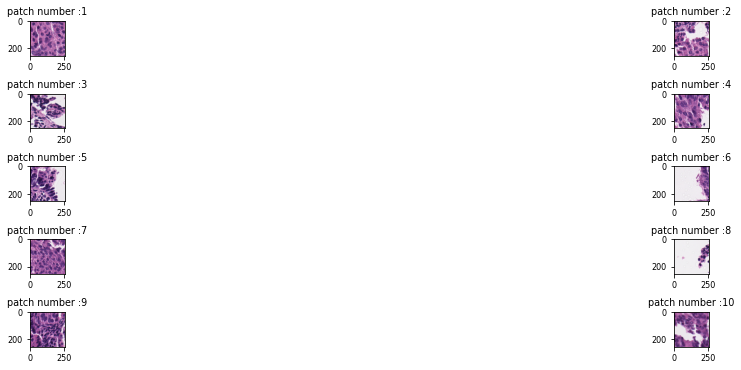

In [5]:
while True:

    #Getting patch size  from the user
    patchsize = int(input(r"please enter patch size ...    forexample: 255 ---->"))
    
    # loading input directory
    output_directory = input(r"please enter output directory ...    forexample: C:\Users\data\output ---->")
    
    
    # loading random state , 1 is True , 0 is False . if 1 entered , patches are extarct Randomly from the whole slide image
    # if 0 entered patches extract From the beginning of the image with a loop on the rows and columns
    # Any part that contains an image, not a white page, is extracted
    
    random_state = int(input(r"please enter random state ...    1 = randomize ,  2 = non-randomized  ---->"))
    if random_state==1 :
        random_state= True
    if random_state==2 :
        random_state= False
        
    # The number of images to be extracted   
    patch_numbers = int(input(r"please enter patch numbers...  ---->"))
    
    #  If the value of the  "vis"  is 1 = The output is also displayed as a plot
    vis_state = int(input("do you want to plot some patches ? (1 = yes i want  ,   2 = no  ) ---->"))
    
    print("\n")
    
    #Checking folder availability
    if os.path.exists(output_directory):
        if random_state==True or random_state==False:
            ReadWsi.patch_extraction(wsi_obj,patchsize,output_directory,random_state,patch_numbers)
            break
        else :
            print('random_state that entered is wrong')
            continue
    else:
        print('output_directory that entered is wrong')
        continue

In [ ]:

patchsize= 256

output_directory = dir_file + '\\out_dir\\'

print("outpot directory is : ",output_directory)

# patch_extraction (openslide_object , patch size , path for saving patches , perform_segmentation_state , random_state)
#tile = ReadWsi.patch_extraction(wsi_obj,patchsize,output_directory,True,True)
#plt.imshow(tile)

print("\n**********************< without randam state >************************\n")


    # loading random state , 1 is True , 0 is False . if 1 entered , patches are extarct Randomly from the whole slide image
    # if 0 entered patches extract From the beginning of the image with a loop on the rows and columns
    # Any part that contains an image, not a white page, is extracted
    
random_state = False

# Number of patches to be extracted
patch_numbers = 6

ReadWsi.patch_extraction(wsi_obj,patchsize,output_directory,random_state,patch_numbers)

print("\n**********************< with randam state >************************\n")
random_state = True
patch_numbers = 6
ReadWsi.patch_extraction(wsi_obj,patchsize,output_directory,random_state,patch_numbers)